In [42]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[*********************100%%**********************]  1 of 1 completed


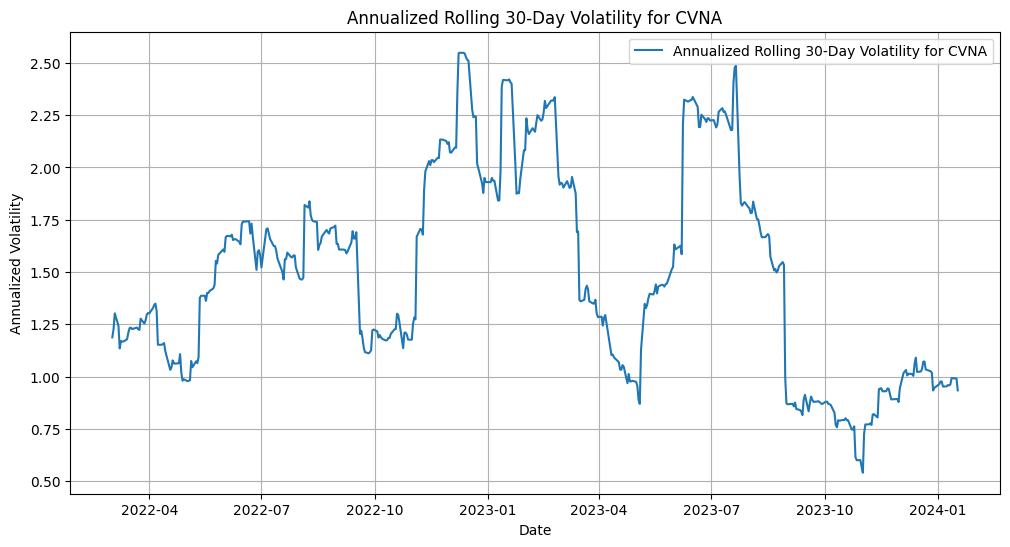

In [10]:
# Define the stock symbol (CVNA for Carvana Co.)
stock_symbol = "CVNA"

# Define the end date as today
end_date = pd.Timestamp.now()

# Calculate the start date as 2 years before the end date
start_date = end_date - pd.DateOffset(years=2)

# Download historical stock data for the given symbol and date range
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# Calculate rolling 30-day volatility
rolling_volatility = stock_data['Daily_Return'].rolling(window=30).std()

# Calculate the annualized volatility by multiplying rolling volatility by the square root of 252 (trading days in a year)
annualized_volatility = rolling_volatility * (252**0.5)

# Plot the annualized rolling 30-day volatility
plt.figure(figsize=(12, 6))
plt.plot(annualized_volatility, label=f'Annualized Rolling 30-Day Volatility for {stock_symbol}')
plt.title(f'Annualized Rolling 30-Day Volatility for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

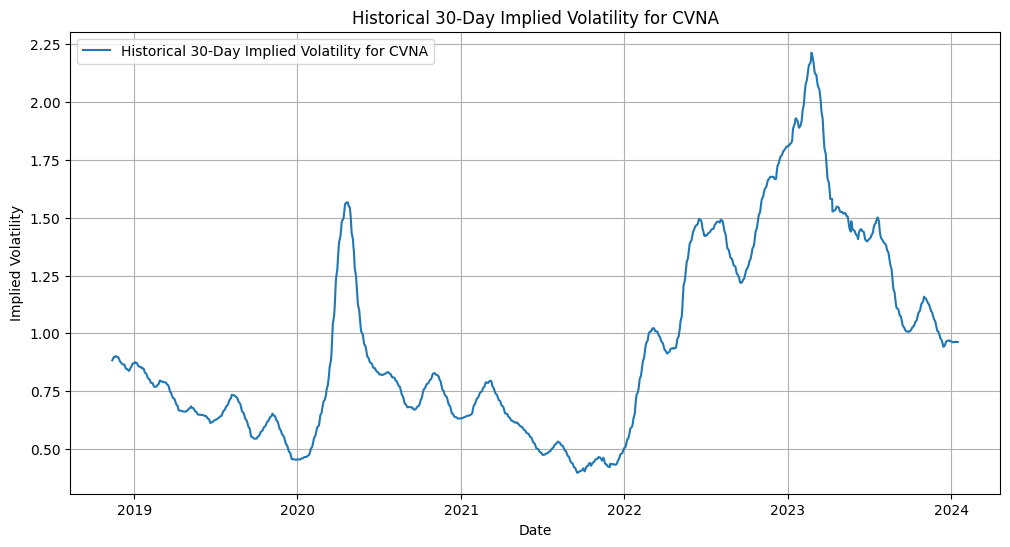

In [11]:
# Define the symbol and the file path
symbol = "cvna"
file_path = '/Users/jackkeim/Downloads/cvna_options-overview-history-01-16-2024.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Define a function to clean and parse the date
def clean_and_parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        # Handle cases where the date cannot be parsed
        return None

# Clean and parse the 'Date' column
df['Date'] = df['Date'].apply(clean_and_parse_date)

# Drop rows with invalid dates (None)
df = df.dropna(subset=['Date'])

# Sort the DataFrame by date
df = df.sort_values(by='Date')

# Calculate rolling 30-day implied volatility
df['Implied_Volatility'] = df['Imp Vol'].str.rstrip('%').astype(float) / 100
rolling_iv = df['Implied_Volatility'].rolling(window=30).mean()

# Plot the historical 30-day implied volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], rolling_iv, label='Historical 30-Day Implied Volatility for CVNA')
plt.title('Historical 30-Day Implied Volatility for CVNA')
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [21]:
# Filter stock_data to include only dates that exist in both DataFrames
common_dates = stock_data.index.intersection(df['Date'])
filtered_stock_data = stock_data.loc[common_dates]

# Merge the filtered stock_data and df DataFrames on the common 'Date' column
merged_df = pd.merge(filtered_stock_data, df, left_index=True, right_on='Date', how='inner')

# Calculate the realized volatility using the 'Daily_Return' column
merged_df['Realized Volatility'] = merged_df['Daily_Return'].rolling(window=30).std() * (252**0.5)

# Select the desired columns for the new DataFrame
new_df = merged_df[['Date', 'Realized Volatility', 'Implied_Volatility']]

# Set the 'Date' column as the index
new_df.set_index('Date', inplace=True)

# Display the new DataFrame
print(new_df)

            Realized Volatility  Implied_Volatility
Date                                               
2022-01-18                  NaN              0.8235
2022-01-19                  NaN              0.7720
2022-01-20                  NaN              0.7999
2022-01-21                  NaN              0.9781
2022-01-24                  NaN              1.0847
...                         ...                 ...
2024-01-09             0.959589              0.8861
2024-01-10             0.957998              0.8887
2024-01-11             0.961800              0.8885
2024-01-12             0.992964              0.8668
2024-01-16             0.990467              0.9081

[501 rows x 2 columns]


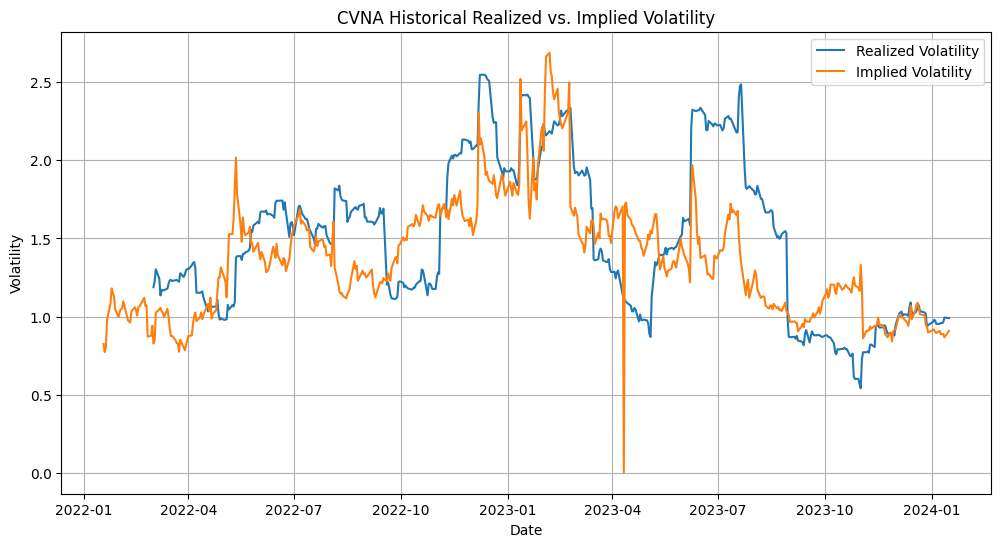

Percentage of days when realized volatility was greater than implied volatility: 57.884231536926144 %
Average Realized Volatility: 1.4856655986071958
Average Implied Volatility: 1.3632930139720558
Volatility of Realized Volatility: 0.48374272065917046
Volatility of Implied Volatility: 0.3720247937047986


In [43]:
# Replace 'Your_Column_Name' with the correct column name for Implied Volatility from your DataFrame
implied_volatility_column_name = 'Implied_Volatility'

# Plot the Realized Volatility and Implied Volatility
plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df['Realized Volatility'], label='Realized Volatility')
plt.plot(new_df.index, new_df[implied_volatility_column_name], label='Implied Volatility')
plt.title(f'{stock_symbol} Historical Realized vs. Implied Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Count of days when realized volatility was greater than implied volatility
days_greater_realized = np.sum(new_df['Realized Volatility'] > new_df[implied_volatility_column_name])

# Total number of days in the DataFrame
total_days = len(new_df)

# Percentage of days when realized volatility was greater than implied volatility
percentage_greater_realized = (days_greater_realized / total_days) * 100

# Average realized volatility
average_realized_volatility = new_df['Realized Volatility'].mean()

# Average implied volatility
average_implied_volatility = new_df[implied_volatility_column_name].mean()

# Volatility of the realized volatility
volatility_realized_volatility = new_df['Realized Volatility'].std()

# Volatility of the implied volatility
volatility_implied_volatility = new_df[implied_volatility_column_name].std()

print("Percentage of days when realized volatility was greater than implied volatility:", percentage_greater_realized, "%")
print("Average Realized Volatility:", average_realized_volatility)
print("Average Implied Volatility:", average_implied_volatility)
print("Volatility of Realized Volatility:", volatility_realized_volatility)
print("Volatility of Implied Volatility:", volatility_implied_volatility)
